In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import os

In [5]:
diri = r'C:\Users\apbarret\Documents\SnowOnSeaIce'
cfsr_fili   = 'CFSR.PRECTOT.season.1979to2010.Nof80.nc'
merra2_fili = 'MERRA2.PRECTOT.season.1980to2016.Nof80.nc'
merra_fili  = 'MERRA.PRECTOT.season.1979to2014.Nof80.nc'
erai_fili   = 'ERAI.PRECTOT.season.1979to2015.Nof80.nc'
asr_fili    = 'ASR.PRECTOT.season.2000to2012.Nof80.nc'

In [6]:
merra2 = xr.open_dataset(os.path.join(diri, merra2_fili))
merra  = xr.open_dataset(os.path.join(diri, merra_fili))
cfsr   = xr.open_dataset(os.path.join(diri, cfsr_fili))
erai   = xr.open_dataset(os.path.join(diri, erai_fili))
asr    = xr.open_dataset(os.path.join(diri, asr_fili))

print merra
print cfsr
print erai
print asr

<xarray.Dataset>
Dimensions:  (time: 36)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1980-02-01 1981-02-01 ...
Data variables:
    precAnn  (time) float64 193.7 201.2 210.0 211.1 226.5 231.1 190.9 201.5 ...
<xarray.Dataset>
Dimensions:  (time: 32)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1980-02-01 1981-02-01 ...
Data variables:
    precAnn  (time) float64 279.4 308.5 323.5 320.5 340.1 355.7 305.2 318.5 ...
<xarray.Dataset>
Dimensions:  (time: 37)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1980-02-01 1981-02-01 ...
Data variables:
    precAnn  (time) float64 201.9 226.5 231.6 226.4 241.3 250.8 204.9 222.1 ...
<xarray.Dataset>
Dimensions:  (time: 13)
Coordinates:
  * time     (time) datetime64[ns] 2000-02-01 2001-02-01 2002-02-01 ...
Data variables:
    precAnn  (time) float32 271.893 267.903 227.242 225.834 193.267 215.971 ...


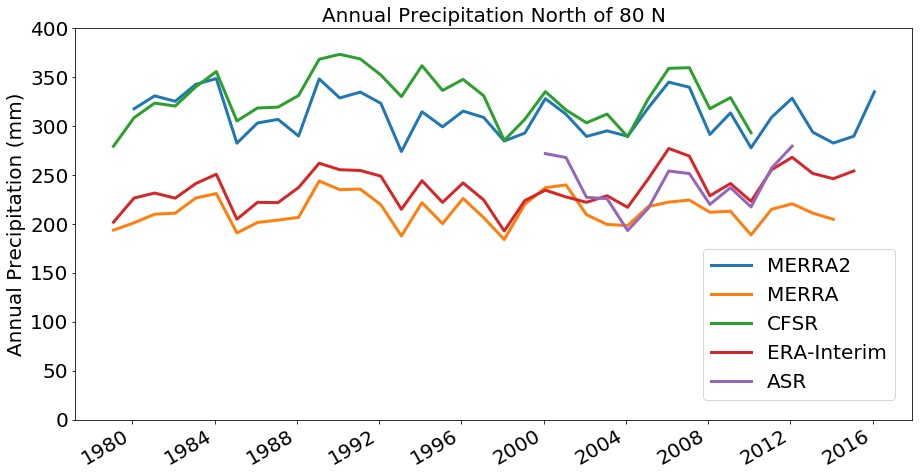

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

merra2['precAnn'].plot(ax=ax, label='MERRA2', linewidth=3)
merra['precAnn'].plot(ax=ax, label='MERRA', linewidth=3)
cfsr['precAnn'].plot(ax=ax, label='CFSR', linewidth=3)
erai['precAnn'].plot(ax=ax, label='ERA-Interim', linewidth=3)
asr['precAnn'].plot(ax=ax, label='ASR', linewidth=3)

ax.set_ylim(0.,400.)
ax.set_title('Annual Precipitation North of 80 N', fontsize=20)
ax.set_ylabel('Annual Precipitation (mm)', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=20)

ax.legend(fontsize=20, bbox_to_anchor=(0.75, 0.05), loc=3, borderaxespad=0.)

fig.savefig(os.path.join(diri,'reanalysis_annual_precipitation_nof80N.png'))

In [17]:
import pandas as pd
df = pd.DataFrame({'MERRA2': merra2['precAnn'].to_series(),
                   'MERRA': merra['precAnn'].to_series(),
                   'CFSR': cfsr['precAnn'].to_series(),
                   'ERAI': erai['precAnn'].to_series(),
                   'ASR': asr['precAnn'].to_series()})
df.head()

,ASR,CFSR,ERAI,MERRA,MERRA2
time,,,,,
1979-02-01,NaN,279.399963,201.861237,193.727386,NaN
1980-02-01,NaN,308.516968,226.475784,201.231033,317.642975
1981-02-01,NaN,323.487488,231.619461,209.965256,330.879517
1982-02-01,NaN,320.458191,226.390381,211.091141,325.295288
1983-02-01,NaN,340.086487,241.321838,226.546097,342.586487


In [21]:
df['2000':'2012'].corr()

,ASR,CFSR,ERAI,MERRA,MERRA2
ASR,1.000000,0.657505,0.582821,0.774889,0.689037
CFSR,0.657505,1.000000,0.935584,0.637323,0.946867
ERAI,0.582821,0.935584,1.000000,0.405161,0.858141
MERRA,0.774889,0.637323,0.405161,1.000000,0.734020
MERRA2,0.689037,0.946867,0.858141,0.734020,1.000000


In [20]:
df['ASR']

time
1979-02-01           NaN
1980-02-01           NaN
1981-02-01           NaN
1982-02-01           NaN
1983-02-01           NaN
1984-02-01           NaN
1985-02-01           NaN
1986-02-01           NaN
1987-02-01           NaN
1988-02-01           NaN
1989-02-01           NaN
1990-02-01           NaN
1991-02-01           NaN
1992-02-01           NaN
1993-02-01           NaN
1994-02-01           NaN
1995-02-01           NaN
1996-02-01           NaN
1997-02-01           NaN
1998-02-01           NaN
1999-02-01           NaN
2000-02-01    271.893280
2001-02-01    267.902527
2002-02-01    227.242477
2003-02-01    225.834213
2004-02-01    193.267242
2005-02-01    215.971008
2006-02-01    254.130630
2007-02-01    251.515106
2008-02-01    219.998245
2009-02-01    237.084091
2010-02-01    217.416168
2011-02-01    257.128021
2012-02-01    279.485016
2013-02-01           NaN
2014-02-01           NaN
2015-02-01           NaN
2016-02-01           NaN
Freq: AS-FEB, Name: ASR, dtype: float32